In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
import seaborn as sns

In [2]:
euro = "data/Euro_6_CLEAN.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df.head()

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,161.0
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,153.0
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,169.0
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,162.0
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,02-Jul-21,169.0


In [3]:
# show all columns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)


In [4]:
emission_date = euro_df.loc[:, ['Powertrain','Cleaned CO2', 'THC + NOx Emissions [mg/km]', 'Date of change']]
emission_date["Date of change"] = pd.to_datetime(emission_date["Date of change"]).dt.strftime('%Y')
emission_date.head()
#emission_date.dtypes


,Powertrain,Cleaned CO2,THC + NOx Emissions [mg/km],Date of change
0,Internal Combustion Engine (ICE),161.0,59.0,2022
1,Internal Combustion Engine (ICE),153.0,59.0,2022
2,Internal Combustion Engine (ICE),169.0,79.0,2020
3,Internal Combustion Engine (ICE),162.0,79.0,2020
4,Internal Combustion Engine (ICE),169.0,79.0,2021


In [5]:
emission_rename = emission_date.rename(columns={"Cleaned CO2": "CO2 Emissions [mg/km]", "Date of change": "Year"})
emission_rename.head()

,Powertrain,CO2 Emissions [mg/km],THC + NOx Emissions [mg/km],Year
0,Internal Combustion Engine (ICE),161.0,59.0,2022
1,Internal Combustion Engine (ICE),153.0,59.0,2022
2,Internal Combustion Engine (ICE),169.0,79.0,2020
3,Internal Combustion Engine (ICE),162.0,79.0,2020
4,Internal Combustion Engine (ICE),169.0,79.0,2021


In [7]:
emission_groupby = emission_rename.groupby(['Year', 'Powertrain'], as_index=False)
emission_summary = emission_groupby.mean()
emission_summary.head()

,Year,Powertrain,CO2 Emissions [mg/km],THC + NOx Emissions [mg/km]
0,2019,Hybrid Electric Vehicle (HEV),116.333333,26.000000
1,2019,Internal Combustion Engine (ICE),157.363636,55.239669
2,2020,Battery Electric Vehicle (BEV) / Pure Electric...,0.000000,0.000000
3,2020,Hybrid Electric Vehicle (HEV),113.355263,61.236842
4,2020,Internal Combustion Engine (ICE),190.738095,50.707148


C:\Users\chisi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

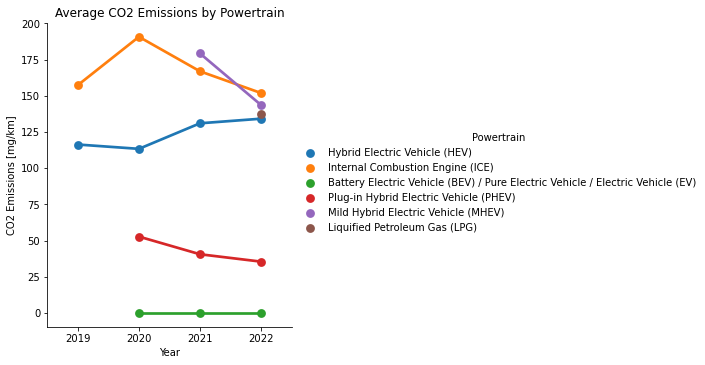

In [25]:
#ploting a line graph of Average CO2 Emissions by Powertrain 
plt.figure(figsize=(10,10))
sns.factorplot(data=emission_summary, x="Year", y="CO2 Emissions [mg/km]", hue="Powertrain")
plt.title('Average CO2 Emissions by Powertrain')
plt.show()

C:\Users\chisi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

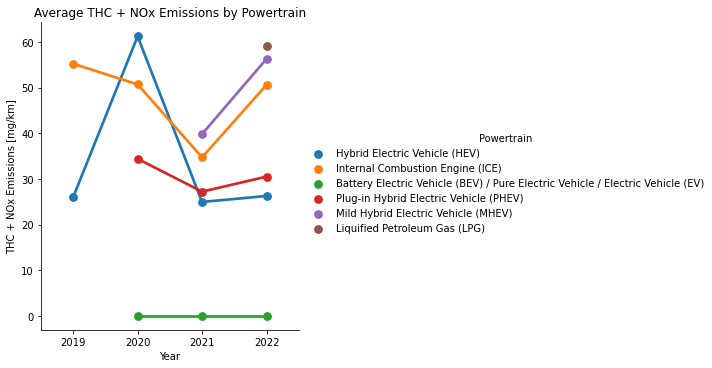

In [21]:
#ploting a line graph of Average THC + NOx Emissions by Powertrain 
plt.figure(figsize=(10,10))
sns.factorplot(data=emission_summary, x="Year", y="THC + NOx Emissions [mg/km]", hue="Powertrain")
plt.title('Average THC + NOx Emissions by Powertrain')
plt.show()